# Part I: Imports and Data Check

In [1]:
## importing libraries ##
import numpy             as np                       # mathematical essentials
import pandas            as pd                       # data science essentials
import sklearn.linear_model                          # linear models
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform    # yeo-johnson
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)
from sklearn.metrics import make_scorer
import seaborn as sns                                  # enhanced data viz
import statsmodels.formula.api as smf                  # linear modeling
from sklearn.neighbors import KNeighborsRegressor      # KNN for Regression
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt                        # data viz
from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
import warnings                                        # warnings from code
from sklearn.tree import plot_tree
import phik
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm



# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
## importing data ##

# reading modeling data into Python
modeling_data =  '/Users/brunotg/Downloads/kaggle/birthweight.csv'

# calling this df_train
df_train = pd.read_csv(modeling_data)



# reading testing data into Python
testing_data = '/Users/brunotg/Downloads/kaggle/kaggle_test_data.csv'

# calling this df_test
df_test = pd.read_csv(testing_data)

In [3]:
########################################
# standard_scaler
########################################
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df



########################################
## visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # number of features to plot
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [537]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5) 

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
0,bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle
1,bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160.0,Not Kaggle
2,bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle
3,bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle
4,bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490.0,Not Kaggle


In [503]:
# checking available features
df_full.columns

Index(['bwt_id', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set'], dtype='object')

# Exploratory Data Analysis and Data Preparation

## Introduction

The database contains variables related to pregnancy and childbirth, containing factors such as parental age and education, as well as the birth weight of the baby. The primary goal of this analysis is to develop an accurate predictive model for identifying cases where a baby's weight is likely to be low, defined as less than 2500 grams. According to the World Health Organization (WHO), this weight threshold poses a significant risk to the baby, and it's estimated that between 15% and 20% of newborns worldwide fall into this category, affecting to over 20 million infants each year.
https://www.who.int/publications/i/item/WHO-NMH-NHD-14.5

In [538]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 63
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bwt_id  473 non-null    object 
 1   mage    473 non-null    int64  
 2   meduc   467 non-null    float64
 3   monpre  473 non-null    int64  
 4   npvis   452 non-null    float64
 5   fage    472 non-null    float64
 6   feduc   463 non-null    float64
 7   omaps   471 non-null    float64
 8   fmaps   471 non-null    float64
 9   cigs    440 non-null    float64
 10  drink   441 non-null    float64
 11  male    473 non-null    int64  
 12  mwhte   473 non-null    int64  
 13  mblck   473 non-null    int64  
 14  moth    473 non-null    int64  
 15  fwhte   473 non-null    int64  
 16  fblck   473 non-null    int64  
 17  foth    473 non-null    int64  
 18  bwght   409 non-null    float64
 19  set     473 non-null    object 
dtypes: float64(9), int64(9), object(2)
memory usage: 77.6+ KB


In [539]:
df_full.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,473.000000,467.000000,473.000000,452.000000,472.000000,463.000000,471.000000,471.000000,440.000000,441.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,409.000000
mean,29.784355,13.680942,2.205074,11.535398,32.169492,13.866091,8.225053,8.951168,1.172727,0.020408,0.505285,0.871036,0.073996,0.054968,0.877378,0.073996,0.048626,3189.870416
std,5.105664,2.136672,1.330149,3.924575,6.097656,2.222327,1.368447,0.575893,4.211621,0.297017,0.500501,0.335515,0.262041,0.228160,0.328350,0.262041,0.215312,748.450059
min,16.000000,3.000000,0.000000,0.000000,18.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,26.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2780.000000
50%,30.000000,13.000000,2.000000,12.000000,32.000000,14.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3340.000000
75%,33.000000,16.000000,3.000000,13.000000,36.000000,16.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3686.000000
max,44.000000,17.000000,8.000000,36.000000,62.000000,17.000000,10.000000,10.000000,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5089.000000


We have decided to exclude the Omaps and Fmaps scores from the analysis because they are based on information that is only available after the baby is born. Our specific focus is on predicting outcomes before the baby is born, and including post-birth information would not align with this objective.

In [540]:
# dropping post-event horizon features
df_full = df_full.drop(labels = ['omaps', 'fmaps'],
                       axis   = 1     )


# checking results
df_full.columns

Index(['bwt_id', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set'], dtype='object')

/Users/brunotg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x500 with 0 Axes>

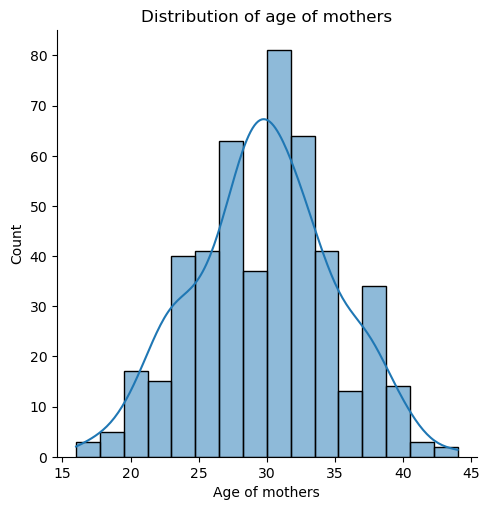

/Users/brunotg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x500 with 0 Axes>

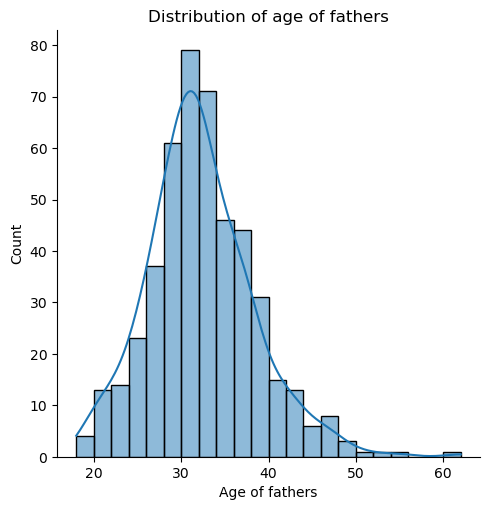

In [545]:
# mothers's age in years
plt.figure(figsize = (9,5))
sns.displot(df_full.mage, kde = True)

# title and labels
plt.title('Distribution of age of mothers')
plt.xlabel('Age of mothers')
plt.ylabel('Count')
plt.show()


# father's age in years
plt.figure(figsize = (9,5))
sns.displot(df_full.fage, kde = True)

# title and labels
plt.title('Distribution of age of fathers')
plt.xlabel('Age of fathers')
plt.ylabel('Count')
plt.show()


The ages of mothers follow a normal distribution, ranging from 15 to 45 years, with a peak between 30 and 35 years. In contrast, the ages of fathers also follow a normal distribution, but with a wider range, spanning from 20 to 60 years. 

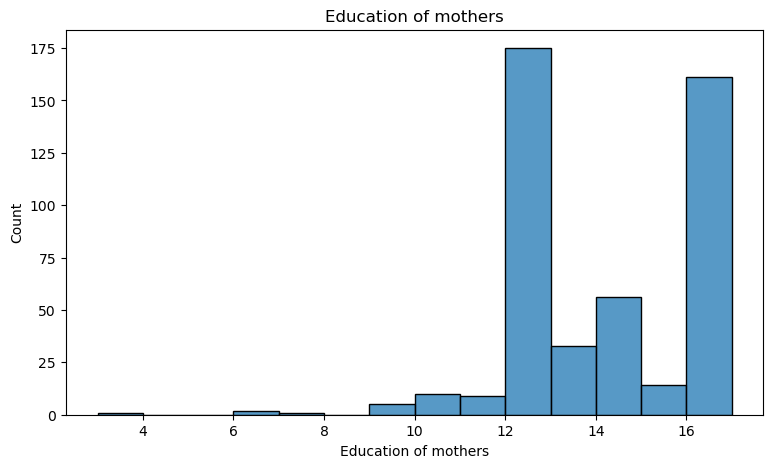

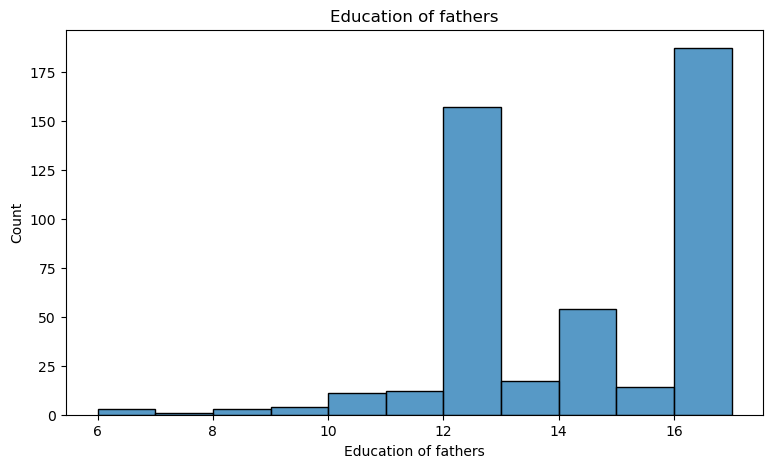

In [547]:
# mothers's education in years
plt.figure(figsize = (9,5))
sns.histplot(df_full.meduc, kde = False)

# title and labels
plt.title('Education of mothers')
plt.xlabel('Education of mothers')
plt.ylabel('Count')
plt.show()


# father's education in years
plt.figure(figsize = (9,5))
sns.histplot(df_full.feduc, kde = False)

# title and labels
plt.title('Education of fathers')
plt.xlabel('Education of fathers')
plt.ylabel('Count')
plt.show()



The data shows that mothers with a 16-year education are the most common, followed by those with 14 years of education, and then those with 12 years of education. On the other hand, there are over 175 fathers with an education level up to 16 years, followed by approximately 150 fathers with 12 years of education, and another group of fathers with 14 years of education.

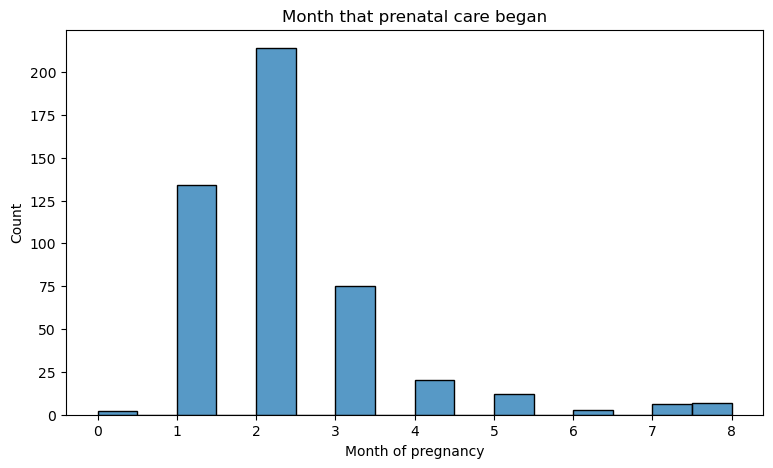

In [548]:
# month of pregnancy that prenatal care began
plt.figure(figsize = (9,5))
sns.histplot(data  = df_full, 
             x     = 'monpre')


# title and labels
plt.title('Month that prenatal care began')
plt.xlabel('Month of pregnancy')
plt.ylabel('Count')
plt.show()


The second month of pregnancy is the most common time for women to start prenatal care, with over 200 cases. This is followed by the first month with approximately 125 cases, and then the third month with about 75 cases. Additionally, there are few cases where the mother receives her first prenatal care in the seventh or eighth month. 

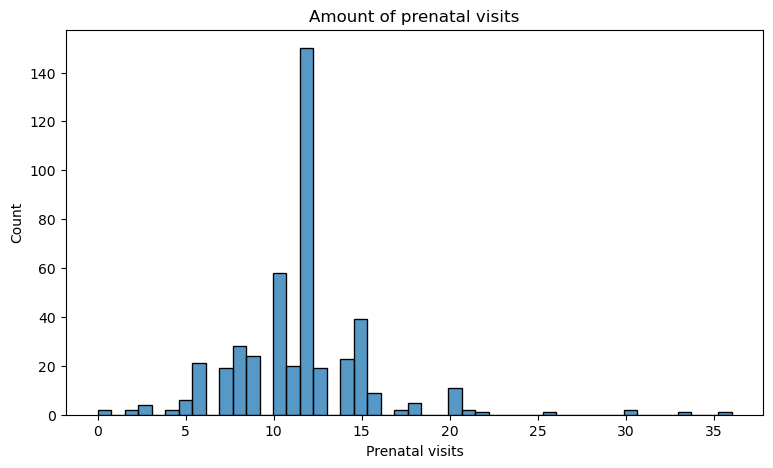

Number of prenatal visits


npvis
12.0    150
10.0     58
15.0     39
8.0      28
9.0      24
Name: count, dtype: int64

In [554]:
# plotting total number of prenatal visits 
plt.figure(figsize = (9,5))
sns.histplot(df_full.npvis)

# title and labels
plt.title('Amount of prenatal visits')
plt.xlabel('Prenatal visits')
plt.ylabel('Count')
plt.show()

# counting prenatal visits
print('Number of prenatal visits')
npvis_count = df_full.npvis.value_counts()
npvis_count.head(n = 5)




We notice that the vast majority of mothers, specifically 150, have a total of 12 prenatal visits with their doctor. This is followed by 58 mothers who have a total of 10 visits, and 39 who, for some reason, had to attend 15 times with their doctor. Additionally, it is important to note that there are very few cases in which visits to the doctor exceed 20 times.

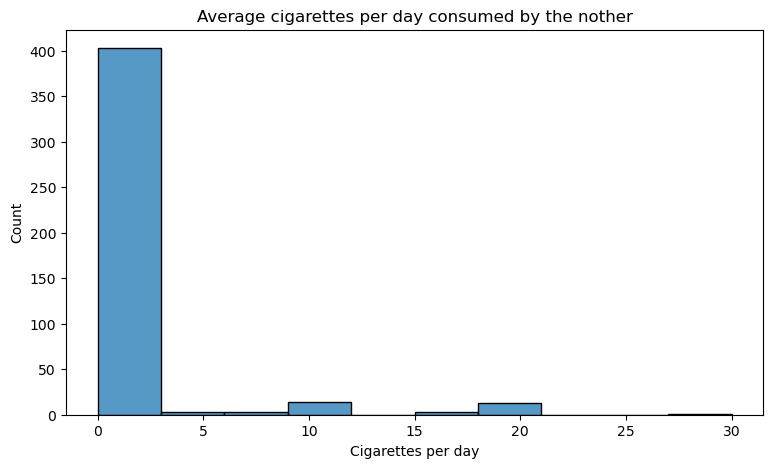

Cigarettes Consumed per Day by the Mother 
cigs
0.0     399
20.0     13
10.0     13
2.0       4
15.0      3
8.0       2
3.0       2
30.0      1
5.0       1
7.0       1
9.0       1
Name: count, dtype: int64


In [559]:
# plotting avg cigarettes per day consumed by the mother
plt.figure(figsize = (9,5))
sns.histplot(df_full.cigs)

# title and labels
plt.title('Average cigarettes per day consumed by the nother')
plt.xlabel('Cigarettes per day')
plt.ylabel('Count')
plt.show()

# counting ciarettes
print("Cigarettes Consumed per Day by the Mother ")
cigs_counts = df_full.cigs.value_counts()
print(cigs_counts)


It is observed that out of a total of 425 mothers, 399 abstained from using tobacco during their pregnancies. However, 13 women reported smoking 20 cigarettes per day, while another 13 reported smoking 10 cigarettes per day.

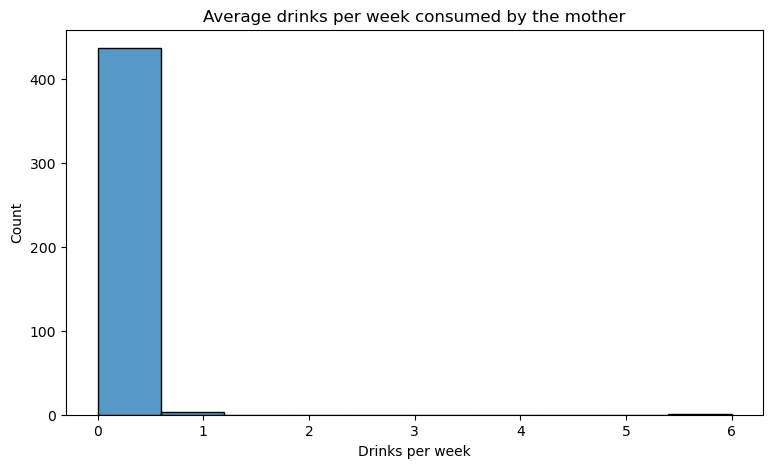

Total average drinks per week consumed by the mother


drink
0.0    437
1.0      3
6.0      1
Name: count, dtype: int64

In [560]:
# plotting avg cigarrettes per day consumed by the mother
plt.figure(figsize = (9,5))
sns.histplot(df_full.drink)

# title and labels
plt.title('Average drinks per week consumed by the mother')
plt.xlabel('Drinks per week')
plt.ylabel('Count')
plt.show()

# counting cigarrettes per day consumed by the mother
print('Total average drinks per week consumed by the mother')
df_full.drink.value_counts()

When it comes to alcoholic beverages, we observed much lower consumption compared to tobacco. Only three women reported consuming one alcoholic beverage per week, while one mother reported consuming six drinks per week. Additionally, a total of 437 women reported avoiding alcohol consumption during pregnancy. 

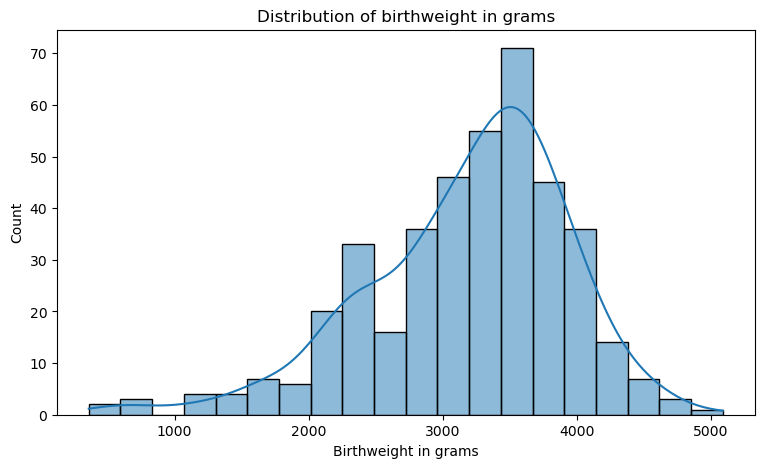

In [561]:
# plotting the dsitribution of birthweight in grams
plt.figure(figsize = (9,5))
sns.histplot(df_full.bwght, 
            kde = True)

# title and labels
plt.title('Distribution of birthweight in grams')
plt.xlabel('Birthweight in grams')
plt.ylabel('Count')
plt.show()

We can see that the distribution of birthweights shows a bell-shaped curve, indicating a relatively normal distribution. The peak of the curve was around 3500 grams, which falls within the average or healthy range for newborns. However, we can also observe a significant number of babies with birthweights below 2500 grams. This lower weight range may signify an increased risk of oxygen deficiencies or a higher probability of respiratory issues, as indicated by Stanford Medicine's research on newborn health. https://www.stanfordchildrens.org/en/topic/default?id=low-birth-weight-90-P02382

In [377]:
# counting male babies
df_full.male.value_counts()


male
1    239
0    234
Name: count, dtype: int64

In [378]:
# counting number of white mothers
df_full.mwhte.value_counts()

mwhte
1    412
0     61
Name: count, dtype: int64

In [69]:
# counting number of black mothers
df_full.mblck.value_counts()

mblck
0    438
1     35
Name: count, dtype: int64

In [70]:
# counting number mothers with different ethnicity that black or white
df_full.moth.value_counts()

moth
0    447
1     26
Name: count, dtype: int64

In [71]:
# counting number of white fathers
df_full.fwhte.value_counts()

fwhte
1    415
0     58
Name: count, dtype: int64

In [72]:
# counting number of black fathers
df_full.fblck.value_counts()

fblck
0    438
1     35
Name: count, dtype: int64

In [73]:
# counting number fathers with different ethnicity that black or white
df_full.foth.value_counts()

foth
0    450
1     23
Name: count, dtype: int64

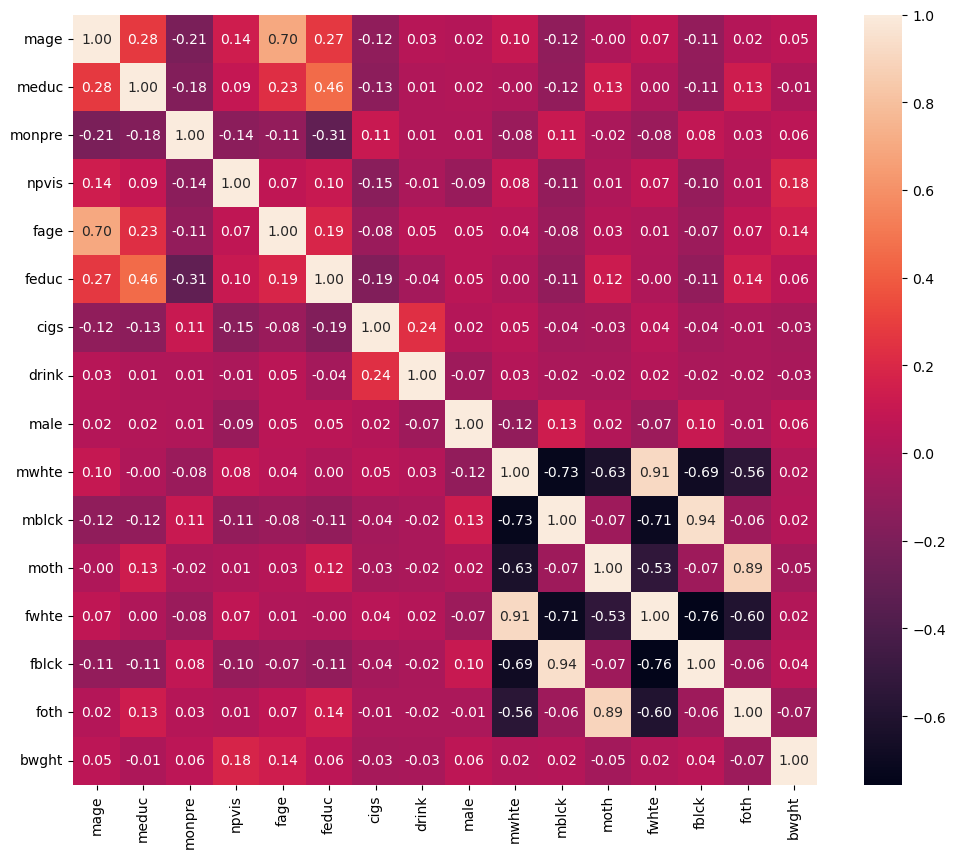

In [590]:
# Plotting a correlation matrix to find out which values affect more the birthweight variable
df_corr = df_full[['mage', 'meduc', 'monpre', 'npvis', 'fage',
           'feduc', 'cigs', 'drink', 'male', 'mwhte', 
           'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght']].corr(method = 'pearson', 
                              numeric_only = True)
plt.figure(figsize=(12, 10))
sns.heatmap(data = df_corr,
           annot = True,
           fmt   =".2f")
plt.show(block   = True)

As we can see, the correlations are very close to 0, what is surprising is that variables such as cigarette and alcohol consumption do not have as much impact on the weight of the baby as expected, it is also true that in this database very few mothers consume these substances during their pregnancy, however, in order to analyze the variables that affect the weight of the baby more accurately, we will create a new variable named low_bwght, separating with 0 the babies that weigh more than 2500 grams and with one those that weigh more than 2500 grams, However, in order to analyze the variables that affect the weight of the baby more accurately, we will create a new variable named low_bwght, separating with 0 the babies that weigh more than 2500 grams and with one those that weigh less than 2500 grams at birth, and in this way, we will analyze the variables that mainly affect the babies with a weight less than 2500 grams.

In [563]:
# creating low_bwght column
df_full['low_bwght'] = 0  

# looping to find low birthweight
for index, row in df_full.iterrows():
    if row['bwght'] < 2500:
        df_full.loc[index, 'low_bwght'] = 1

# checking results
print(f"""
Mean Low Birthweight:     {round(df_full['bwght'][df_full['low_bwght'] == 1].mean(), 1)}
Mean Normal Birthweight:  {round(df_full['bwght'][df_full['low_bwght'] == 0].mean(), 1)}
""")


Mean Low Birthweight:     2017.1
Mean Normal Birthweight:  3475.0



In [564]:
# checking value counts for low_bwght
df_full['low_bwght'].value_counts(normalize       = False,
                                        sort      = False,
                                        ascending = False)

low_bwght
0    379
1     94
Name: count, dtype: int64

In [565]:
# checking results
df_full.head()

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght
0,bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle,0
1,bwt_2,21,NaN,1,6.0,21.0,NaN,NaN,NaN,0,1,0,0,1,0,0,1160.0,Not Kaggle,1
2,bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle,0
3,bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle,0
4,bwt_5,30,15.0,2,12.0,36.0,16.0,NaN,NaN,1,1,0,0,1,0,0,3490.0,Not Kaggle,0


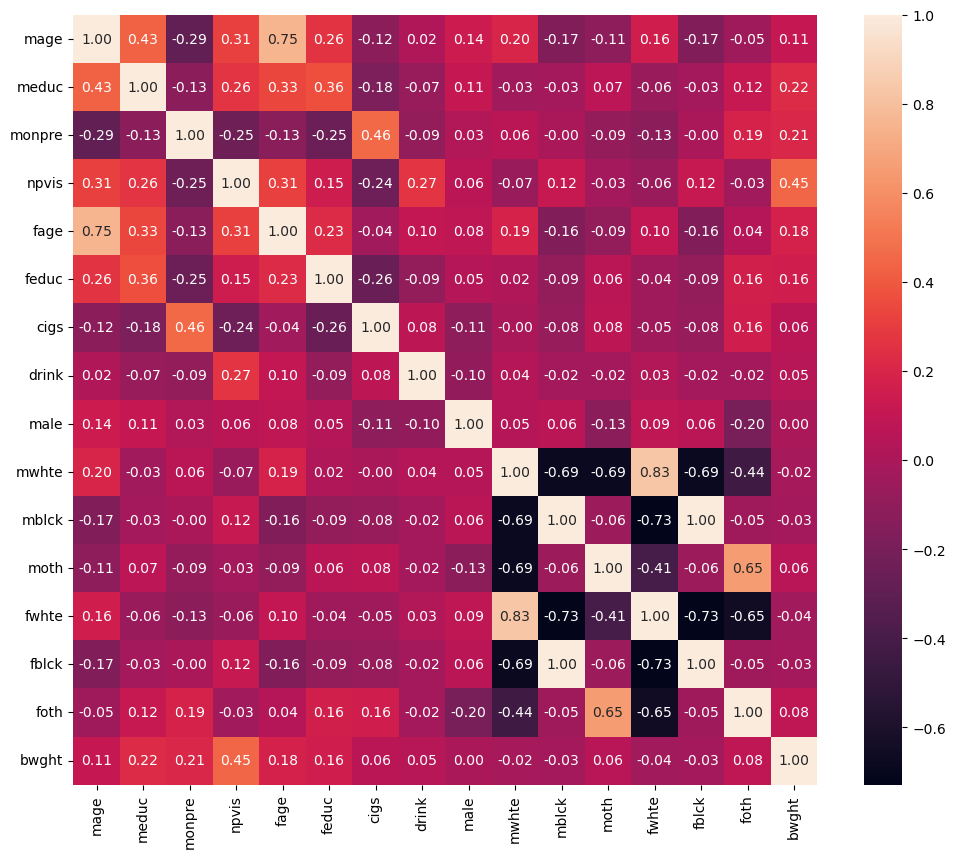

In [593]:
# Filter tto include only rows where low_bwght equals 1
df_low_bwght = df_full[df_full['low_bwght'] == 1]

columns = ['mage', 'meduc', 'monpre', 'npvis', 'fage',
           'feduc', 'cigs', 'drink', 'male', 'mwhte', 
           'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght']

# Plotting a correlation matrix to find out which values affect more the birthweight variable
df_corr = df_low_bwght[columns].corr(method = 'pearson', 
                              numeric_only = True)

plt.figure(figsize=(12, 10))
sns.heatmap(data = df_corr,
           annot = True,
           fmt   =".2f")
plt.show(block   = True)



After defining the variable low_birthweight and filtering it for values 1 and 0, we observed a significant increase in correlations. The variable with the highest correlation was the number of prenatal visits during pregnancy, followed by the mother's education and the month in which prenatal care begins.

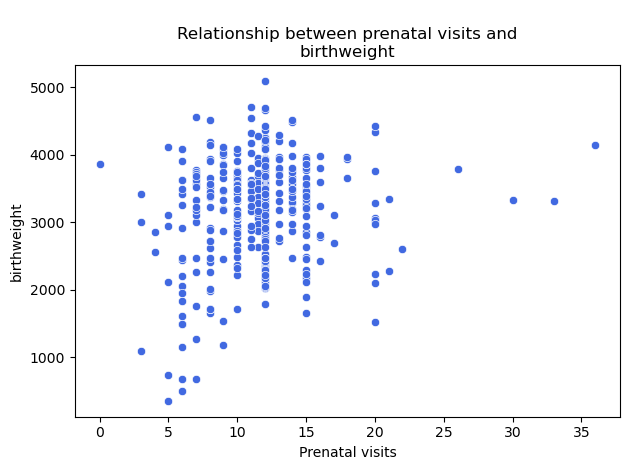

In [598]:
# developing a scatterplot 
sns.scatterplot(x     = df_full['npvis'],
                y     = df_full['bwght'], # 
                color = 'royalblue')


# title and labels
plt.title(label   = """
Relationship between prenatal visits and
birthweight""")
plt.xlabel(xlabel = 'Prenatal visits')
plt.ylabel(ylabel = 'birthweight')


# cleaning up layout and rendering visual
plt.tight_layout()
plt.show()

When we analyze prenatal visits along with the baby's weight in grams, we observe that as the number of visits increases, the baby's weight tends to be higher. The majority of mothers who have their general checkup, usually between 10 and 15, tend to have a normal weight for their babies. However, mothers with fewer visits tend to have babies with lower weights. This correlation makes sense, as a correct follow-up by a health professional can help improve habits and lifestyle during the pregnancy process.

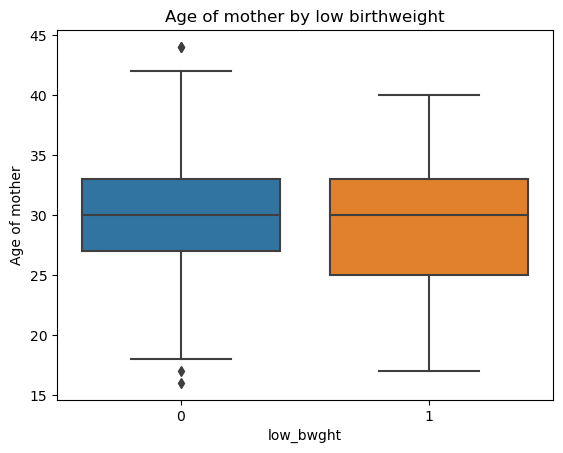

In [478]:
# developing a boxplot 
sns.boxplot(x='low_bwght', 
            y='mage', 
            data=df_full)

# title and labels
plt.xlabel('low_bwght')
plt.ylabel('Age of mother')
plt.title('Age of mother by low birthweight')
plt.show()


In our analysis, we observed that the age distribution of mothers with low birth weight babies differs from that of mothers with higher birth weight babies. The first quartile of mothers with low birth weight babies is younger than that of mothers with higher birth weight babies, while the median age is similar for both groups. This suggests that there is not a significant difference in the ages of mothers with babies weighing under 2500 grams and those with babies weighing over 2500 grams.

Average education of mothers in years
13.65 13.806


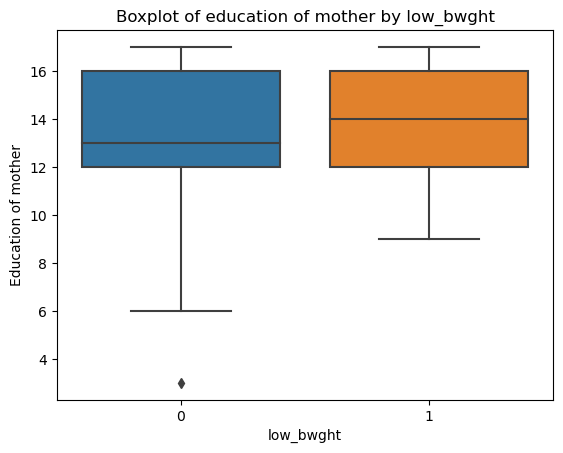

In [569]:
# filtering data for women who smoke a cigarette a day and have low birth weight
filtered_data1  = df_full[(df_full['low_bwght'] == 1)]
filtered_data0 = df_full[(df_full['low_bwght'] == 0)]

# Calculate the average of the filtered women's ages
average_meduc1  = round(filtered_data1['meduc'].mean(), 3)
average_meduc0 = round(filtered_data0['meduc'].mean(), 3)

print('Average education of mothers in years')
print(average_meduc0, 
      average_meduc1)

# title and labels
sns.boxplot(x='low_bwght', 
            y='meduc', 
            data=df_full)
plt.xlabel('low_bwght')
plt.ylabel('Education of mother')
plt.title('Boxplot of education of mother by low_bwght')
plt.show()


When we analyze the boxplot comparing the education of mothers in both groups, we observe that there is no significant difference. This is because the mean number of years of education is very similar. Additionally, although it may appear that mothers with a baby of lower weight have more years of education, it's important to note that approximately 80% of the mothers have a baby with a normal weight.

Average number of cigarettes per day consumed by the mother
Group 1: 2.0, Group 0: 1.0


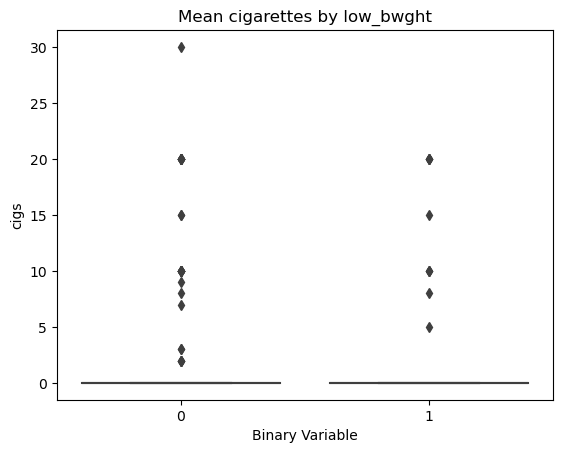

In [577]:
# Filtering data for women who smoke a cigarette a day and have low birth weight
filtered_data1  = df_full[(df_full['low_bwght'] == 1)]
filtered_data0  = df_full[(df_full['low_bwght'] == 0)]

# Calculate the average of the filtered women's ages
average_cigs1  = round(filtered_data1['cigs'].mean(), 0)
average_cigs0  = round(filtered_data0['cigs'].mean(), 0)

print('Average number of cigarettes per day consumed by the mother')
print(f'Group 1: {average_cigs1}, Group 0: {average_cigs0}')


# Title and labels'
sns.boxplot(x='low_bwght', 
            y='cigs', 
            data=df_full)  
# title and format
plt.xlabel('Binary Variable')
plt.ylabel('cigs')
plt.title('Mean cigarettes by low_bwght')
plt.show() 


In this boxplot we see interestingly that mothers smoke a similar amount per day in both groups, however, if we notice that proportionally, mothers in group 1 do smoke more than mothers in group 0, with an average consumption of 2 cigarettes per day compared to only 1, in addition, we see that in both groups there are mothers who smoke more than 15 cigarettes per day during pregnancy.

In [574]:
## Missing Values ##
missing_values = df_full.isnull().sum()

# Print the number of missing values per column
print("Missing values per column:")
print(missing_values)


Missing values per column:
bwt_id        0
mage          0
meduc         6
monpre        0
npvis        21
fage          1
feduc        10
cigs         33
drink        32
male          0
mwhte         0
mblck         0
moth          0
fwhte         0
fblck         0
foth          0
bwght        64
set           0
low_bwght     0
dtype: int64


For the missing values, we noticed that the variables that can predict children's weight, such as "cigs" and "drink," have the highest number of missing values. Since the majority of mothers avoid smoking, we will replace the missing values with 0 for these variables. For prenatal visits, we will use the mean to impute the missing values. Additionally, for the missing values of father's education, we will use the mean of the education levels of other parents.

In [578]:
#### Missing Value Imputations

#Imputating missing values for the meduc column
df_full['meduc'].fillna(0, inplace = True)

#Calculating mean
npvis_mean = df_full['npvis'].mean()

#Using the mean to impute missing values
df_full['npvis'].fillna(npvis_mean, inplace = True)

#Calculating mean
fage_mean = df_full['fage'].mean()

#Using the mean to impute missing values
df_full['fage'].fillna(fage_mean, inplace = True)

#Calculating mean
feduc_mean = df_full['feduc'].mean()

#Using the mean to impute missing values
df_full['feduc'].fillna(feduc_mean, inplace = True)

#Calculating mode for cigs
cigs_mode = df_full['cigs'].mode()[0]

#Filling missing values with the mode
df_full['cigs'].fillna(cigs_mode, inplace = True)

#Calculating mode for drink
drink_mode = df_full['drink'].mode()[0]

#Filling missing values with the mode
df_full['drink'].fillna(drink_mode, inplace = True)


df_full.isnull().sum()

bwt_id        0
mage          0
meduc         0
monpre        0
npvis         0
fage          0
feduc         0
cigs          0
drink         0
male          0
mwhte         0
mblck         0
moth          0
fwhte         0
fblck         0
foth          0
bwght        64
set           0
low_bwght     0
dtype: int64

# Feature engineering

Combined parental education (combined_pedu): This characteristic combines maternal and paternal education, more educated parents are expected to have better access to resources and knowledge about prenatal care, which could positively influence the baby birth weight.

Average age of parents (avr_page): Represents the average age of the parents, a higher average age could be associated with better preparation and resources for pregnancy and potentially influencing higher birth weight.

Average parental education (avr_pedu): This characteristic calculates the average level of education of parents, a higher parental education may be linked to better understanding of prenatal care and greater access to health resources, leading to a positive impact on baby birth weight.

Total number of prenatal visits (tot_pvisit): The more prenatal appointments a mother have during pregnancy, the higher the chance of receiving sufficient medical care and guidance on healthy lifestyle habits, potentially leading to normal birthweight.

Total cigarette consumption during pregnancy (tot_cigs): Calculating the total cigarette consumption during pregnancy is important for evaluating the overall impact on the weight. This variable takes into account the total number of cigarettes smoked throughout the 9 months of pregnancy.

Parents age and education average(page_edu_avg):  This variable represents both the parents' accumulated experience and their education level, both of which have been identified as factors affecting infant birth weight. 

Sum of parental age and number of prenatal visits (page_npvis_sum): This variable contains two crucial aspects of maternal and child health: the medical care received during pregnancy and the age of the parents. 

In [599]:
# Combined education of parents.
df_full['combined_pedu'] = df_full['meduc'] + df_full['feduc']

# The average age of parents
df_full['avr_page'] = (df_full['mage'] + df_full['fage']) / 2

# The average education of parents
df_full['avr_pedu'] = (df_full['meduc'] + df_full['feduc']) / 2

# Total number of prenatal visits during pregnancy.
df_full['tot_pvisit'] = df_full['monpre'] * df_full['npvis']

# Total cigarette consumption during pregnancy (assuming 9 months)
df_full['tot_cigs'] = df_full['cigs'] * 30 * 9

# The average age and education of parents
df_full['page_edu_avg'] = (df_full['mage'] + df_full['fage'] + df_full['meduc'] + df_full['feduc']) / 4

# Sum of the parents' age and the number of prenatal visits.
df_full['page_npvis_sum'] = df_full['mage'] + df_full['fage'] + df_full['npvis']




In [600]:
df_full.head()

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght,combined_pedu,avr_page,avr_pedu,tot_pvisit,tot_cigs,page_edu_avg,page_npvis_sum
0,bwt_1,28,12.0,2,10.0,31.0,17.000000,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle,0,29.000000,29.5,14.500000,20.0,0.0,22.000000,69.0
1,bwt_2,21,0.0,1,6.0,21.0,13.866091,0.0,0.0,0,1,0,0,1,0,0,1160.0,Not Kaggle,1,13.866091,21.0,6.933045,6.0,0.0,13.966523,48.0
2,bwt_3,27,15.0,2,11.0,32.0,16.000000,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle,0,31.000000,29.5,15.500000,22.0,0.0,22.500000,70.0
3,bwt_4,33,17.0,1,20.0,39.0,17.000000,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle,0,34.000000,36.0,17.000000,20.0,0.0,26.500000,92.0
4,bwt_5,30,15.0,2,12.0,36.0,16.000000,0.0,0.0,1,1,0,0,1,0,0,3490.0,Not Kaggle,0,31.000000,33.0,15.500000,24.0,0.0,24.250000,78.0


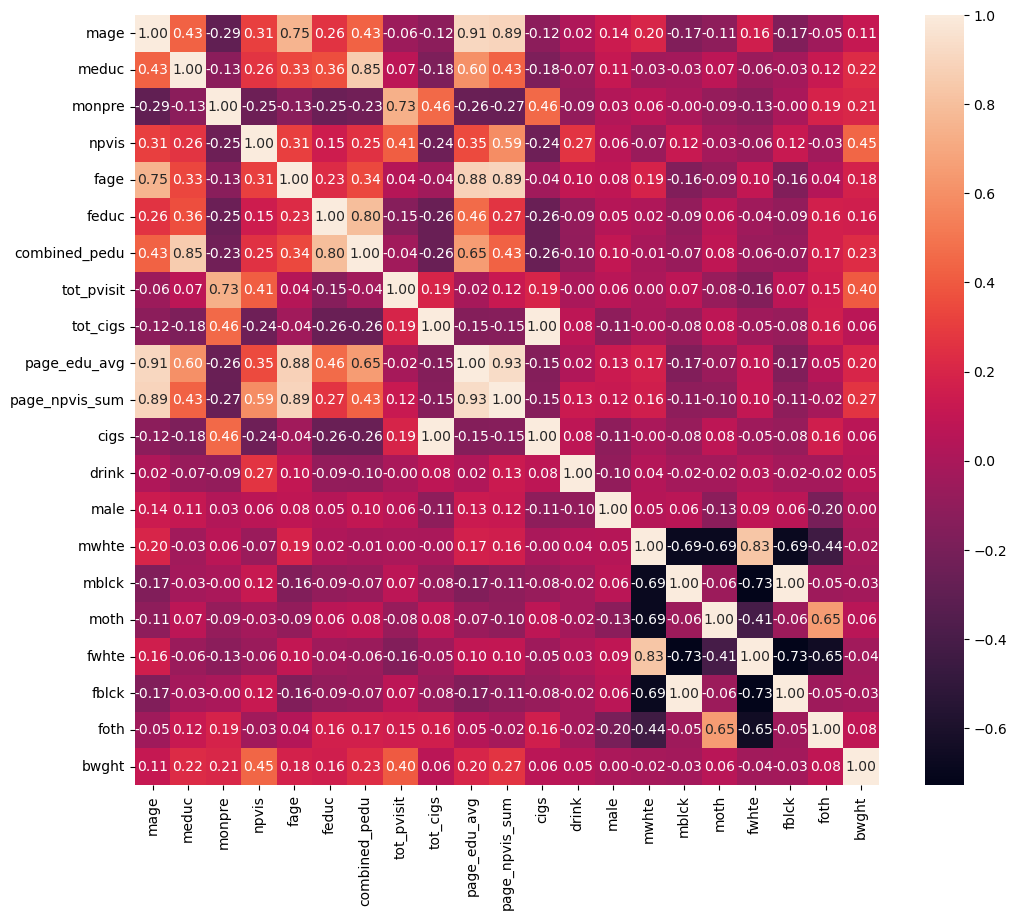

In [601]:
# Filter tto include only rows where low_bwght equals 1
df_low_bwght = df_full[df_full['low_bwght'] == 1]

# Select the columns to calculate the correlation.
columns_of_interest = ['mage', 'meduc', 'monpre', 'npvis', 
                       'fage', 'feduc', 'combined_pedu', 'tot_pvisit',
                       'tot_cigs','page_edu_avg', 'page_npvis_sum',
                       'cigs', 'drink', 'male', 'mwhte', 
                       'mblck', 'moth', 'fwhte', 'fblck', 
                       'foth', 'bwght']

# Calcular la matriz de correlación entre estas variables
correlation_matrix = df_low_bwght[columns_of_interest].corr()

# Title and labels
plt.figure(figsize=(12, 10))
sns.heatmap(data = correlation_matrix,
           annot = True,
           fmt   =".2f")
plt.show(block   = True)


After conducting the feature engineering process and incorporating the new variables, we performed a correlation matrix analysis, this analysis revealed, as we mentioned already, that the number of visits per month significantly influences weight, additionally, we observed an increased correlation by combining parental ages with the number of prenatal visits.

In [602]:
# Filter to include only rows where low_bwght equals 1
df_low_bwght = df_full[df_full['low_bwght'] == 1]

# Define numeric variables
df_numeric = df_low_bwght.drop(['bwt_id', 'set'], axis=1)

# Create Pearson correlation
df_full_corr = df_numeric.corr(method='pearson').round(decimals=4)

# checking the results
df_full_corr['bwght'].sort_values(ascending=False)

#ELIMINAR

bwght             1.0000
npvis             0.4455
tot_pvisit        0.4014
page_npvis_sum    0.2696
avr_pedu          0.2340
combined_pedu     0.2340
meduc             0.2244
monpre            0.2080
page_edu_avg      0.2023
fage              0.1776
feduc             0.1575
avr_page          0.1555
mage              0.1144
foth              0.0819
tot_cigs          0.0627
cigs              0.0627
moth              0.0610
drink             0.0496
male              0.0009
mwhte            -0.0193
fblck            -0.0282
mblck            -0.0282
fwhte            -0.0390
low_bwght            NaN
Name: bwght, dtype: float64

In [603]:
# exlude non numeric variables
df_numeric = df_full.drop(['bwt_id', 'set'], axis=1)


# using Pearson correlation
df_full_corr = df_numeric.corr(method = 'pearson').round(decimals = 4)


# checking results
df_full_corr.loc[ : , 'bwght' ].sort_values(ascending = False)

bwght             1.0000
npvis             0.1788
page_npvis_sum    0.1571
fage              0.1386
tot_pvisit        0.1124
avr_page          0.1087
page_edu_avg      0.1014
male              0.0611
feduc             0.0598
monpre            0.0551
mage              0.0546
fblck             0.0418
combined_pedu     0.0285
avr_pedu          0.0285
mblck             0.0230
fwhte             0.0168
mwhte             0.0154
meduc            -0.0055
drink            -0.0255
tot_cigs         -0.0297
cigs             -0.0297
moth             -0.0494
foth             -0.0746
low_bwght        -0.7736
Name: bwght, dtype: float64

In [604]:
# using the phi coefficient for correlation
df_phi_corr = df_numeric.phik_matrix().round(decimals = 4)


# checking results
df_phi_corr.loc[ : , 'bwght' ].sort_values(ascending = False)

interval columns not set, guessing: ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'low_bwght', 'combined_pedu', 'avr_page', 'avr_pedu', 'tot_pvisit', 'tot_cigs', 'page_edu_avg', 'page_npvis_sum']


bwght             1.0000
low_bwght         0.9904
page_npvis_sum    0.4839
avr_pedu          0.4689
combined_pedu     0.4689
fage              0.3981
npvis             0.3578
avr_page          0.3205
feduc             0.3055
foth              0.1277
moth              0.1086
mwhte             0.1006
monpre            0.0896
page_edu_avg      0.0792
fwhte             0.0727
male              0.0376
fblck             0.0000
meduc             0.0000
mblck             0.0000
drink             0.0000
tot_pvisit        0.0000
tot_cigs          0.0000
cigs              0.0000
mage              0.0000
Name: bwght, dtype: float64

When using the Phi method for classification analysis, we noticed a notable increase in correlations, indicating that these particular new variables are crucial in describing the weight variable.

page_npvis_sum    0.4839, avr_pedu          0.4689, combined_pedu     0.4689

# Part II - Preparing for Logistic Regression

In [606]:
# creating feature sets
continuous     = ['mage', 'meduc', 'monpre', 'npvis',
                  'fage', 'feduc', 'cigs', 'drink', 'bwght',
                  'combined_pedu', 'com_page', 'avr_page',
                  'avr_pedu', 'page_edu_avg', 'page_npvis_sum']

non_continuous = ['bwt_id', 'male', 'mwhte', 'mblck', 
                  'moth', 'fwhte', 'fblck', 'foth', 'set',
                  'low_bwght', 'tot_pvisit', 'tot_cigs']


# pearson correlation
df_full_corr = df_numeric.corr(method = 'pearson').round(decimals = 4)


# phi coefficient
df_phi_corr = df_numeric.phik_matrix().round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{df_full_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{df_phi_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}
""")

interval columns not set, guessing: ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'low_bwght', 'combined_pedu', 'avr_page', 'avr_pedu', 'tot_pvisit', 'tot_cigs', 'page_edu_avg', 'page_npvis_sum']

Point-Biserial Correlations
---------------------------
bwght             1.0000
npvis             0.1788
page_npvis_sum    0.1571
fage              0.1386
tot_pvisit        0.1124
avr_page          0.1087
page_edu_avg      0.1014
male              0.0611
feduc             0.0598
monpre            0.0551
mage              0.0546
fblck             0.0418
combined_pedu     0.0285
avr_pedu          0.0285
mblck             0.0230
fwhte             0.0168
mwhte             0.0154
meduc            -0.0055
drink            -0.0255
tot_cigs         -0.0297
cigs             -0.0297
moth             -0.0494
foth             -0.0746
low_bwght        -0.7736
Name: bwght, dtype: float64


Phi Coefficients
------

In [608]:
# subsetting data to transform
data_st = df_full[['low_bwght', 'bwght', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 
                'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 
                'foth', 'combined_pedu', 
                'avr_page', 'avr_pedu', 'tot_pvisit', 'tot_cigs', 
                'page_edu_avg', 'page_npvis_sum']]




# checking skewness
data_st.skew().round(decimals = 2)

low_bwght          1.51
bwght             -0.82
mage              -0.01
meduc             -1.84
monpre             2.12
npvis              1.40
fage               0.65
feduc             -0.47
cigs               4.10
drink             19.55
male              -0.02
mwhte             -2.22
mblck              3.27
moth               3.92
fwhte             -2.31
fblck              3.27
foth               4.21
combined_pedu     -0.70
avr_page           0.15
avr_pedu          -0.70
tot_pvisit         6.99
tot_cigs           4.10
page_edu_avg      -0.10
page_npvis_sum    -0.01
dtype: float64

In [609]:
# yeo-johnson transformation
x_transformed = power_transform(X           = data_st,
                                method      = 'yeo-johnson',
                                standardize = True        )


# storing results as a DataFrame
x_transformed_df = pd.DataFrame(data    = x_transformed,
                                columns = list(data_st.columns))


# checking skewness results
x_transformed_df.skew().round(decimals = 2)

low_bwght          1.51
bwght             -0.09
mage              -0.02
meduc             -0.17
monpre            -0.03
npvis              0.27
fage               0.00
feduc             -0.11
cigs               2.95
drink             10.77
male              -0.02
mwhte             -2.22
mblck              3.27
moth               3.92
fwhte             -2.31
fblck              3.27
foth               4.21
combined_pedu     -0.07
avr_page           0.00
avr_pedu          -0.07
tot_pvisit         0.06
tot_cigs           2.95
page_edu_avg      -0.01
page_npvis_sum     0.00
dtype: float64

# Standardization

In [610]:
excluded_columns = ['low_bwght', 'bwght']  
x_transformed_df = standard_scaler(df=x_transformed_df.drop(columns=excluded_columns))


# standardizing X-data (st = scaled and transformed)
x_data_st = standard_scaler(df = x_transformed_df)


# checking results
x_data_st.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,combined_pedu,avr_page,avr_pedu,tot_pvisit,tot_cigs,page_edu_avg,page_npvis_sum
count,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.71,-3.02,-4.31,-4.19,-2.90,-2.69,-0.31,-0.09,-1.01,-2.60,-0.28,-0.24,-2.67,-0.28,-0.23,-2.68,-2.56,-2.68,-5.17,-0.31,-2.63,-2.75
25%,-0.74,-0.76,-1.24,-0.36,-0.65,-0.90,-0.31,-0.09,-1.01,0.38,-0.28,-0.24,0.37,-0.28,-0.23,-0.90,-0.56,-0.90,-0.72,-0.31,-0.61,-0.66
50%,0.04,-0.35,0.10,0.18,0.05,-0.02,-0.31,-0.09,0.99,0.38,-0.28,-0.24,0.37,-0.28,-0.23,0.06,0.03,0.06,0.22,-0.31,0.04,0.04
75%,0.63,1.11,0.88,0.18,0.69,1.00,-0.31,-0.09,0.99,0.38,-0.28,-0.24,0.37,-0.28,-0.23,1.22,0.69,1.22,0.62,-0.31,0.62,0.57
max,2.78,1.67,2.54,5.13,3.73,1.57,3.25,10.83,0.99,0.38,3.54,4.15,0.37,3.54,4.42,1.87,3.20,1.87,5.03,3.25,3.22,3.13


# Data Partitioning

### Separating the Kaggle Data

In [611]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [612]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = "low_bwght"


#!###########################!#
#!# choose your x-variables #!#
#!###########################!#

#transforming the x_features to integer
x_features = [ 'bwt_id','mage', 'meduc', 'monpre', 'npvis', 
              'fage', 'feduc', 'cigs', 'drink',
              'male', 'mwhte', 'mblck', 'fwhte', 
              'combined_pedu', 'avr_page', 'avr_pedu',
              'tot_pvisit', 'tot_cigs', 'page_edu_avg', 'page_npvis_sum'] # this should be a list



In [613]:
df.columns

Index(['bwt_id', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'low_bwght', 'combined_pedu', 'avr_page', 'avr_pedu', 'tot_pvisit', 'tot_cigs', 'page_edu_avg', 'page_npvis_sum'], dtype='object')

In [614]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 409
Features  (Columns): 25


Training Data (X-side)
----------------------
Observations (Rows): 306
Features  (Columns): 19


Training Data (y-side)
----------------------
Feature Name:        low_bwght
Observations (Rows): 306


Testing Data (X-side)
---------------------
Observations (Rows): 103
Features  (Columns): 19


Testing Data (y-side)
---------------------
Feature Name:        low_bwght
Observations (Rows): 103


# Logistic Regression

Starting by stratifying the data to preserve the same proportion of low birthweights in both datasets

In [615]:
# low_bwght proportions
df_full.loc[ : ,'low_bwght'].value_counts(normalize = True).round(decimals = 2)

low_bwght
0    0.8
1    0.2
Name: proportion, dtype: float64

Preparing Explanatory and Response Data

In [616]:
# declaring explanatory variables
low_bwght_data = x_data


# declaring response variable
low_bwght_target = y_data

In [617]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y_data) # preserving balance

# Resetear el índice de x_train y y_train
#x_train.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)


# merging training data for statsmodels
low_bwght_train = pd.concat([x_train, y_train], axis = 1)

In [619]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
low_bwght
0    0.8
1    0.2
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
low_bwght
0    0.81
1    0.19
Name: proportion, dtype: float64



##### Build a Univariate Logistic Regression Model

In [620]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """low_bwght ~ npvis""",
                           data    = low_bwght_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.486944
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: low_bwght        Pseudo R-squared: 0.016   
Date:               2024-04-06 15:20 AIC:              302.0095
No. Observations:   306              BIC:              309.4567
Df Model:           1                Log-Likelihood:   -149.00 
Df Residuals:       304              LL-Null:          -151.44 
Converged:          1.0000           LLR p-value:      0.027169
No. Iterations:     6.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -0.4010    0.4871  -0.8232  0.4104  -1.3557   0.5537
npvis       -0.0901    0.0428  -2.1043  0.0354  -0.1740  -0.0062
===============================================================

"""

In [622]:
# train/test split with the full model
#low_bwght_data   =  x_data_st[ candidate_dict['logit_sig'] ]
#low_bwght_target =  df_full  [ 'low_bwght']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            low_bwght_data,
            low_bwght_target,
            random_state = 702,
            test_size    = 0.25,
            stratify     = low_bwght_target)

In [624]:
# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# saving scoring data for future use
train_score = round(logreg_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(logreg_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap

# displaying and saving the gap between training and testing
print(f"""\
Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
""") 

Training ACCURACY: 0.8072
Testing  ACCURACY: 0.7961
Train-Test Gap   : 0.0111



/Users/brunotg/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [625]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[82  1]
 [20  0]]


In [626]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 82
False Positives: 1
False Negatives: 20
True Positives : 0



# Adjusting The Classification Threshold

In [627]:
# printing the predicted probabilities of 0 and 1, respectively
pd.DataFrame(data = logreg_fit.predict_proba(low_bwght_data).round(decimals = 2),
             columns = ['Class 0', 'Class 1']).head(n = 5)

,Class 0,Class 1
0,0.88,0.12
1,0.92,0.08
2,0.83,0.17
3,0.89,0.11
4,0.86,0.14


In [628]:
# printing actual predictions (0 or 1)
pd.DataFrame(data    = logreg_fit.predict(low_bwght_data),
             columns = ['Predicted Class']).head(n = 5)

,Predicted Class
0,0
1,0
2,0
3,0
4,0


In [629]:
# storing objects for predictions and true y values
true_y         = low_bwght_target
pred_probs     = pd.DataFrame(logreg_fit.predict_proba(low_bwght_data)).round(decimals = 2)
pred_thresh_50 = pd.DataFrame(logreg_fit.predict(low_bwght_data))

In [630]:
# combining the predictions into a DataFrame and renaming columns
prediction_df = pd.concat([true_y, pred_probs, pred_thresh_50], axis=1)
prediction_df.columns = ['true_y', 'prob_0', 'prob_1', 'pred_thresh_50']

# checking results
prediction_df.head(n=15)



,true_y,prob_0,prob_1,pred_thresh_50
0,0,0.88,0.12,0
1,1,0.92,0.08,0
2,0,0.83,0.17,0
3,0,0.89,0.11,0
4,0,0.86,0.14,0
5,0,0.76,0.24,0
6,0,0.83,0.17,0
7,0,0.83,0.17,0
8,1,0.86,0.14,0
9,1,0.68,0.32,0


# Random Forest

In [632]:
# train/test split with standardized x-features
low_bwght_data   =  x_data_st
low_bwght_target =  df_full['low_bwght']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            low_bwght_data,
            low_bwght_target,
            random_state = 702,
            test_size    = 0.25,
            stratify     = low_bwght_target) 

In [633]:
# INSTANTIATING a random forest model with default hyperparameters
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 702)


In [634]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(rf_default_fit.score(x_train, y_train), ndigits = 4))
print('Testing  ACCURACY:', round(rf_default_fit.score(x_test , y_test ), ndigits = 4))


# saving AUC score
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = rf_default_fit_pred), ndigits = 4))

Training ACCURACY: 0.9915
Testing  ACCURACY: 0.7731
AUC Score        : 0.4842


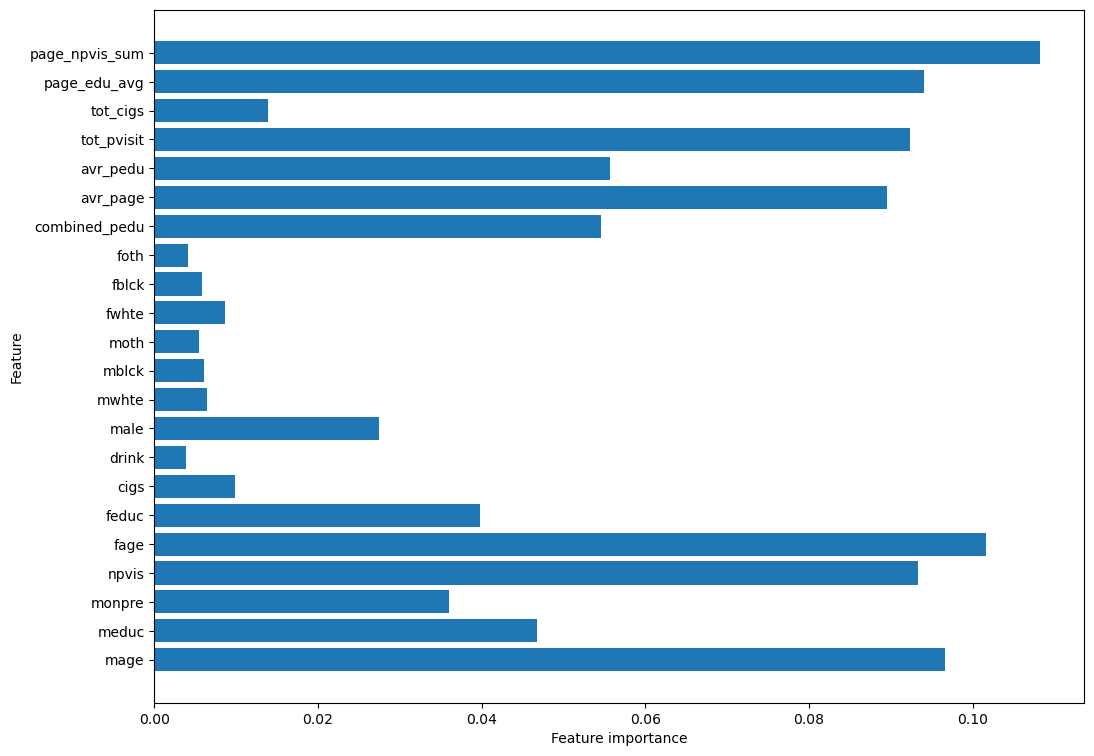

In [635]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [636]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 92
False Positives: 3
False Negatives: 24
True Positives : 0



random forest hyperparameters using RandomizedSearchCV

In [637]:
# instantiating a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]
max_depth        = np.arange(1, 20, 1)


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 702)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(low_bwght_data, low_bwght_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(decimals = 4))

/Users/brunotg/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.5387


In [638]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(n_estimators=350, random_state=702, warm_start=True)

In [639]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 702)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(low_bwght_data, low_bwght_target)


# PREDICTING on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# saving scoring data for future use
forest_tuned_train_score = round(forest_tuned.score(x_train, y_train),
                                 ndigits = 4)

forest_tuned_test_score  = round(forest_tuned.score(x_test , y_test ),
                                 ndigits = 4)


# saving the AUC score
forest_tuned_auc = round(roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred), ndigits = 4)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned_train_score)
print('Forest Tuned Testing  ACCURACY:', forest_tuned_test_score)
print('Forest Tuned AUC Score        :', forest_tuned_auc)

Forest Tuned Training ACCURACY: 0.9915
Forest Tuned Testing  ACCURACY: 1.0
Forest Tuned AUC Score        : 1.0


In [640]:
# Defining the model with optimized hyperparameters
forest_tuned = RandomForestClassifier(criterion='entropy',
                                      min_samples_leaf=1,
                                      n_estimators=100,
                                      warm_start=True,
                                      bootstrap=True,
                                      random_state=702)

# Perform k-fold cross validation
cv_scores = cross_val_score(forest_tuned, low_bwght_data, low_bwght_target, cv=5, scoring='accuracy')

# Checking results
print('Forest Tuned Cross-Validation ACCURACY:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())


Forest Tuned Cross-Validation ACCURACY: [0.76842105 0.76842105 0.78947368 0.78723404 0.73404255]
Mean Cross-Validation Accuracy: 0.7695184770436729


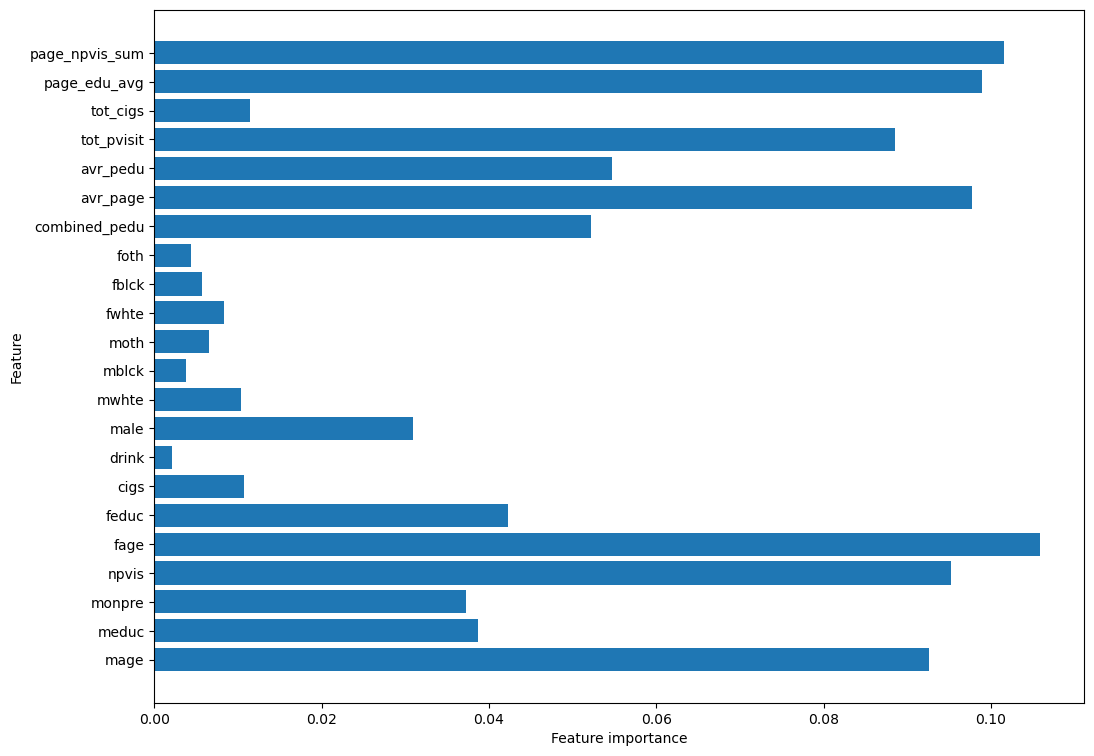

In [641]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [642]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test,
                               y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 95
False Positives: 0
False Negatives: 0
True Positives : 24



# Gradient Boosted Machines
## Selected model

In [643]:
# INSTANTIATING the model object without hyperparameters
full_gbm_def = GradientBoostingClassifier(loss          = 'log_loss',
                                          learning_rate = 0.1,
                                          n_estimators  = 100,
                                          criterion     = 'friedman_mse',
                                          max_depth     = 3,
                                          warm_start    = False,
                                          random_state  = 702)


# FITTING to the training data
full_gbm_def_fit = full_gbm_def.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_def_pred = full_gbm_def_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(full_gbm_def_fit.score(x_train, y_train),
                                  ndigits = 4))
      
print('Testing ACCURACY :', round(full_gbm_def_fit.score(x_test, y_test),
                                  ndigits = 4))
      
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = full_gbm_def_pred),
                                  ndigits = 4))

Training ACCURACY: 0.9153
Testing ACCURACY : 0.7815
AUC Score        : 0.5206


In [644]:
# unpacking the confusion matrix
gbm_def_tn, \
gbm_def_fp, \
gbm_def_fn, \
gbm_def_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_def_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_def_tn}
False Positives: {gbm_def_fp}
False Negatives: {gbm_def_fn}
True Positives : {gbm_def_tp}
""")


True Negatives : 91
False Positives: 4
False Negatives: 22
True Positives : 2



# Confusion matrix analysis 

True Negatives (TN): These are the cases where the model correctly predicts that the baby's weight will not be less than 2500 grams, and in reality it is not. In this case, there are 91 correct predictions.

False Positives (FP): These are cases where the model incorrectly predicts that the baby's weight will be less than 2500 grams when, in fact, it is not. In other words, the model predicts positive when it is actually negative. In this case, there are 4 incorrect predictions.

False Negatives (FN): These are the cases where the model incorrectly predicts that the baby's weight will not be less than 2500 grams when, in fact, it is. That is, the model predicts negative when in fact it is positive. In this case, there are 22 incorrect predictions.

True Positives (TP): These are the cases where the model correctly predicts that the baby's weight will be less than 2500 grams when, in fact, it is. In this case, there are 2 correct predictions.

In this particular scenario, the primary objective is to train the model to minimize false negatives. The ultimate goal is to prevent instances where the baby is born with a birth weight of less than 2500. It's important to note that false positives, in this case, do not pose a risk to the newborn's life.

In [645]:
# instantiating a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 702)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 702,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(low_bwght_data, low_bwght_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 125, 'max_depth': 6, 'learning_rate': 0.1}
Tuned Training AUC: 0.5534


In [646]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(max_depth=6, n_estimators=125, random_state=702,
                           warm_start=True)

In [647]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 6,
                                       n_estimators  = 125,
                                       warm_start    = True,
                                       random_state  = 702)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(low_bwght_data, low_bwght_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(gbm_tuned_fit.score(x_train, y_train),
                                  ndigits = 4))


print('Testing  ACCURACY:', round(gbm_tuned_fit.score(x_test, y_test),
                                  ndigits = 4))


print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = gbm_tuned_pred),
                                  ndigits = 4))

Training ACCURACY: 0.9915
Testing  ACCURACY: 1.0
AUC Score        : 1.0


In [648]:
# Defining the model with optimized hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 475,
                                       n_estimators  = 200,
                                       warm_start    = True,
                                       random_state  = 702)

# Perform k-fold cross validation
cv_scores = cross_val_score(gbm_tuned, low_bwght_data, low_bwght_target, cv=5, scoring='accuracy')

# Checking results
print('Forest Tuned Cross-Validation ACCURACY:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

Forest Tuned Cross-Validation ACCURACY: [0.74736842 0.71578947 0.69473684 0.81914894 0.69148936]
Mean Cross-Validation Accuracy: 0.7337066069428891


In [649]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 95
False Positives: 0
False Negatives: 0
True Positives : 24



# Preparing Submission File for Kaggle

In [452]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = rf_default_fit.predict(x_data_kaggle)

In [453]:
df_full.columns

Index(['bwt_id', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set', 'low_bwght', 'combined_pedu', 'com_page', 'avr_page', 'avr_pedu', 'tot_pvisit', 'tot_cigs', 'parent_age_education_average', 'parent_age_npvis_sum'], dtype='object')

### Creating the Kaggle File

In [533]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwght" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions)


# set column 'bwt_id' as the index of the DataFrame
model_pred_df.set_index(df_test['bwt_id'], inplace=True)

In [530]:
df_test.head()

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,set
0,bwt_14,30,16.0,5,10.0,38,16.0,9,9,0.0,0.0,1,1,0,0,1,0,0,Kaggle
1,bwt_16,29,12.0,1,9.0,28,12.0,9,10,0.0,0.0,0,1,0,0,1,0,0,Kaggle
2,bwt_24,28,16.0,1,12.0,30,16.0,8,9,0.0,0.0,1,1,0,0,1,0,0,Kaggle
3,bwt_30,30,12.0,1,12.0,28,12.0,9,9,0.0,0.0,0,1,0,0,1,0,0,Kaggle
4,bwt_57,37,17.0,3,12.0,36,16.0,9,9,0.0,0.0,0,1,0,0,1,0,0,Kaggle


In [534]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "/Users/brunotg/Downloads/kaggle/low_bwght_prediction1.csv",
                     index       = True,
                     index_label = 'bwt_id')
